In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from transformers import pipeline

# Importing Dataset

In [2]:
zipfile_path = r'/content/drive/MyDrive/Uplift Datasets/UCI ML Drug Review Dataset.zip'
file_folder_path = r'/content/drive/MyDrive/Uplift Datasets'

In [3]:
with zipfile.ZipFile(zipfile_path) as zip_ref:
    zip_ref.extractall(file_folder_path)

In [4]:
file_path = r'/content/drive/MyDrive/Uplift Datasets/drugsComTrain_raw.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,13-Dec-14,116


# Data Sanity Check

In [7]:
df.shape

(161297, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [9]:
# Finding missing values

df.isnull().sum()

,0
uniqueID,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


In [10]:
# Finding missing values (percentage)

df.isnull().sum()/df.shape[0]*100

,0
uniqueID,0.000000
drugName,0.000000
condition,0.557357
review,0.000000
rating,0.000000
date,0.000000
usefulCount,0.000000


In [11]:
# Finding duplicates

df.duplicated().sum()

np.int64(0)

In [12]:
# Identifying garbage values

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)


drugName
Levonorgestrel                                   3657
Etonogestrel                                     3336
Ethinyl estradiol / norethindrone                2850
Nexplanon                                        2156
Ethinyl estradiol / norgestimate                 2117
                                                 ... 
Proleukin                                           1
Neupogen                                            1
Sensorcaine-MPF                                     1
Dextromethorphan / phenylephrine / pyrilamine       1
Medi-Quik Spray                                     1
Name: count, Length: 3436, dtype: int64
****************************************
condition
Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                         

# Exploratory Data Analysis

In [13]:
# Descriptive statistics (numerical)

df.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [14]:
# Descriptive statistics (object)

df.describe(include="object")

,drugName,condition,review,date
count,161297,160398,161297,161297
unique,3436,884,112329,3579
top,Levonorgestrel,Birth Control,"""Good""",1-Mar-16
freq,3657,28788,33,146


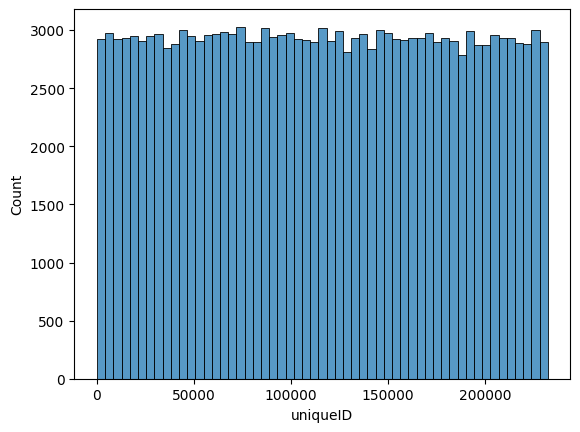

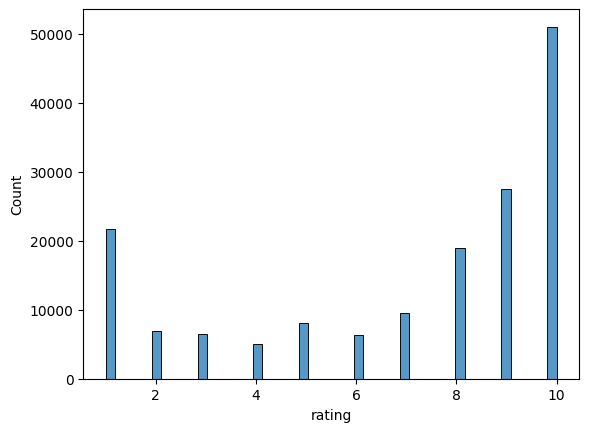

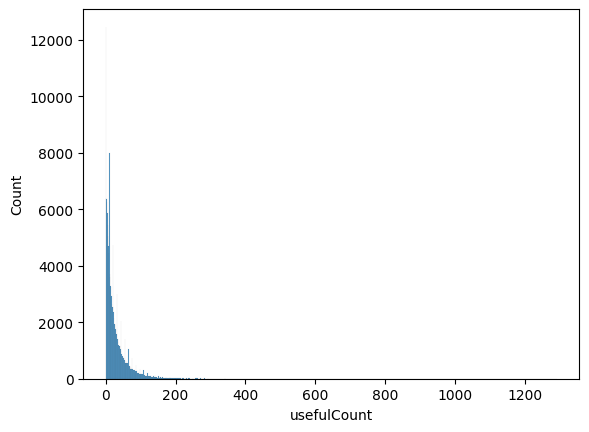

In [15]:
# Histogram to understand the distribution

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

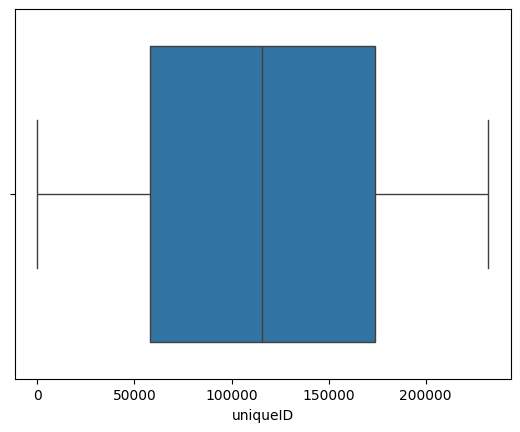

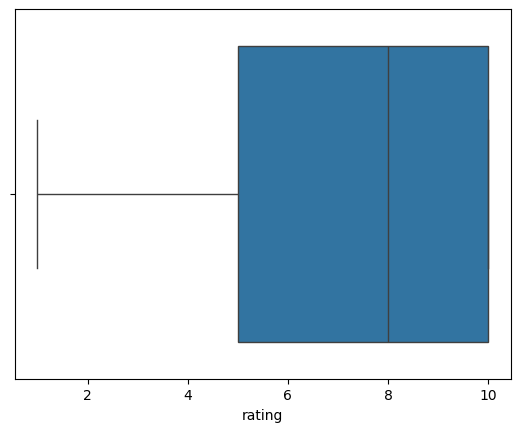

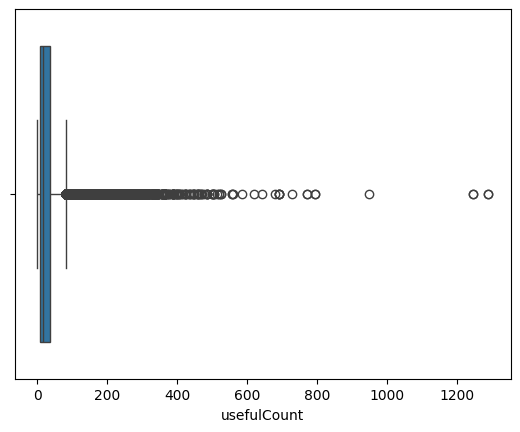

In [16]:
# Boxplot to identify outliers

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()


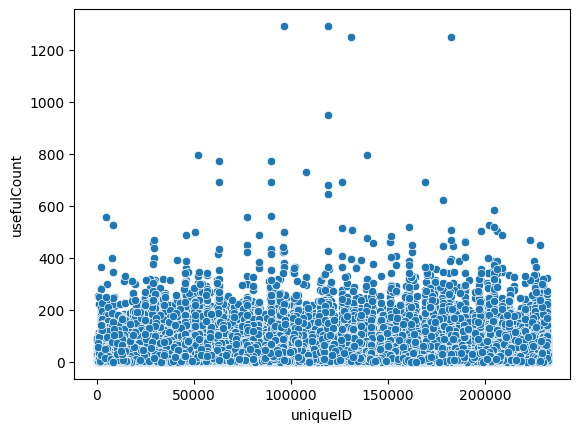

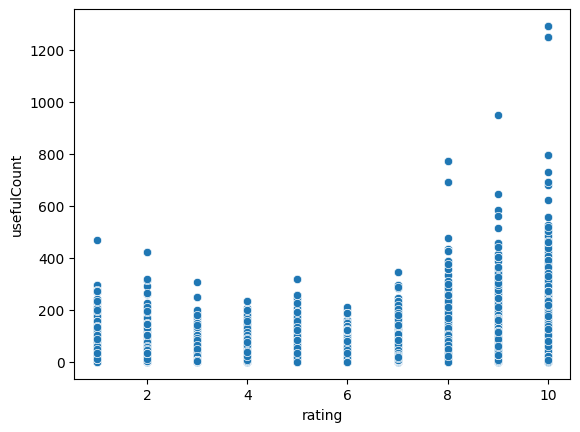

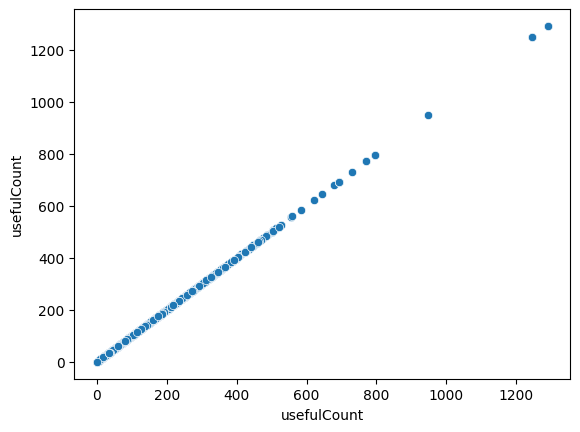

In [17]:
# Scatter plot to understand the relationship

for i in ['uniqueID', 'rating', 'usefulCount']:
    sns.scatterplot(data=df, x=i, y='usefulCount')
    plt.show()

In [18]:
df.select_dtypes(include="number").corr().columns

Index(['uniqueID', 'rating', 'usefulCount'], dtype='object')

In [19]:
# Correlation with heatmap to interpret the relation and multicolliniarity

df.select_dtypes(include='number').corr()

,uniqueID,rating,usefulCount
uniqueID,1.000000,0.015185,0.016475
rating,0.015185,1.000000,0.234185
usefulCount,0.016475,0.234185,1.000000


<Axes: >

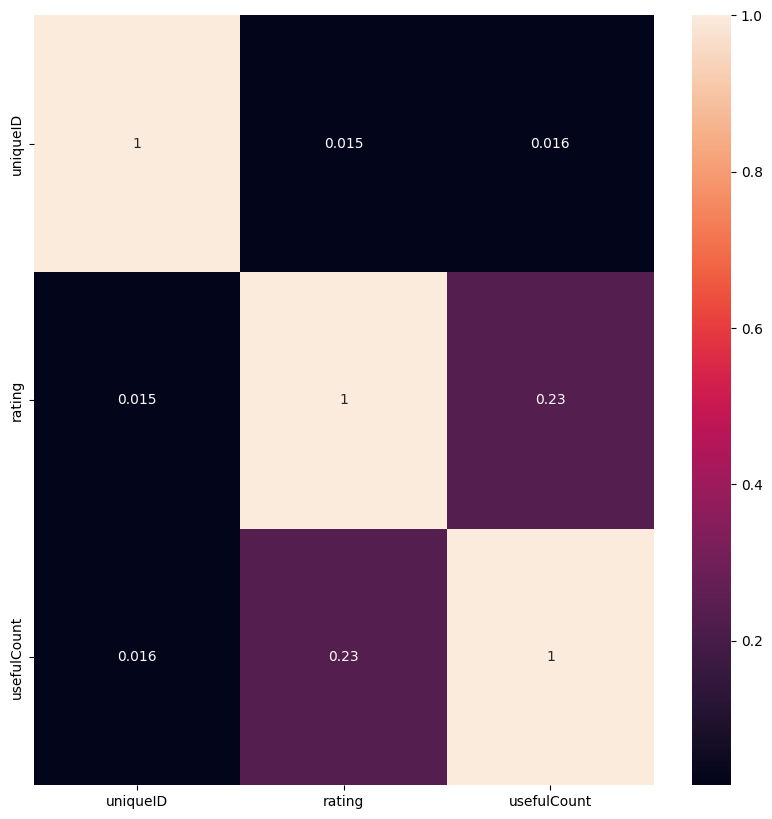

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Missing Value Treatments

In [21]:
df.isnull().sum()/df.shape[0]*100

,0
uniqueID,0.000000
drugName,0.000000
condition,0.557357
review,0.000000
rating,0.000000
date,0.000000
usefulCount,0.000000


In [22]:
df['condition'].fillna(df['condition'].mode()[0], inplace=True)

/tmp/ipython-input-1241390274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna(df['condition'].mode()[0], inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    161297 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


# Garbage Value treatment

In [24]:
garbage_conditions = df[df['condition'].astype(str).str.contains('users found this comment helpful', na=False)]
display(garbage_conditions)

,uniqueID,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
160322,173464,Alli,99</span> users found this comment helpful.,"""Great pill... You can definitely see it worki...",9,2-Apr-15,99
160791,150010,Soma,62</span> users found this comment helpful.,"""I am sharing a painful experience actually. T...",5,11-Mar-10,62
160899,209239,Geodon,7</span> users found this comment helpful.,"""I&#039;ve been taking Geodon for about a mont...",7,4-Feb-11,7
160921,96527,Neurontin,92</span> users found this comment helpful.,"""At 300mg 4x daily my pain was almost gone. """,9,8-Jul-13,92


In [25]:
# Garbage removal on the condition column

print(f"Shape of DataFrame before removing garbage conditions: {df.shape}")

df = df[~df['uniqueID'].isin(garbage_conditions['uniqueID'])]

print(f"Shape of DataFrame after removing garbage conditions: {df.shape}")

Shape of DataFrame before removing garbage conditions: (161297, 7)
Shape of DataFrame after removing garbage conditions: (160397, 7)


In [26]:
# Text cleaning on the review column

df['review'] = df['review'].str.replace('&#039;', "'")
display(df.head())

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# Data Stratification

In [42]:
# Perform stratified sampling on the 'condition' column

# Calculate the fraction needed for each condition to get a total of 2000 rows
total_rows = 10000
frac = total_rows / len(df)

stratified_sample_df = df.groupby('condition', group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42, replace=True))

# Assigning stratified_sample_df to df
df_strat = stratified_sample_df

df_strat

/tmp/ipython-input-2054488122.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_df = df.groupby('condition', group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=42, replace=True))


,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment_label,sentiment_score
107765,158447,Methylphenidate,ADHD,"""I'm 18 years old and have been prescribed 74m...",8,12-Feb-16,36,LABEL_0,0.500915
83645,88414,Adderall,ADHD,"""I am prescribed Adderall XRs. I am only on 30...",7,20-Sep-13,24,LABEL_0,0.599657
60658,207126,Quillivant XR,ADHD,"""My son was prescribed this at the age of five...",5,13-Dec-15,17,LABEL_0,0.755106
140073,178457,Adzenys XR-ODT,ADHD,"""Have been taking for few months. Switched fro...",10,25-Apr-17,7,LABEL_2,0.958735
55723,180686,Adderall XR,ADHD,"""Adderall was a great drug for my ADD. It didn...",8,24-Jul-09,8,LABEL_0,0.746726
...,...,...,...,...,...,...,...,...,...
143101,32679,Budesonide / formoterol,moterol),"""Was put on this one while in the hospital wit...",1,16-Jan-17,5,LABEL_0,0.532358
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624
84431,173421,Phenylephrine,mulation) (phenylephrine),"""I had severe congestion and pressure causing ...",9,19-Oct-16,4,LABEL_2,0.918954


In [43]:
df_strat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9981 entries, 107765 to 101227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uniqueID         9981 non-null   int64  
 1   drugName         9981 non-null   object 
 2   condition        9981 non-null   object 
 3   review           9981 non-null   object 
 4   rating           9981 non-null   int64  
 5   date             9981 non-null   object 
 6   usefulCount      9981 non-null   int64  
 7   sentiment_label  9981 non-null   object 
 8   sentiment_score  9981 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.0+ MB


# Sentiment Analysis

In [44]:
# Initialize the text analysis pipeline

sentiment_model = "cardiffnlp/twitter-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_model)

Device set to use cuda:0


In [46]:
# Use the classifier model to the dataframe
# Truncate reviews to the maximum input length of the model (512 tokens)
max_length = 512
results = classifier([review[:max_length] for review in df_strat['review'].tolist()])

#Creating new column in the dataframe to store the results
df_strat['sentiment_label'] = [result['label'] for result in results]
df_strat['sentiment_score'] = [result['score'] for result in results]

df_strat

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment_label,sentiment_score
107765,158447,Methylphenidate,ADHD,"""I'm 18 years old and have been prescribed 74m...",8,12-Feb-16,36,LABEL_0,0.500915
83645,88414,Adderall,ADHD,"""I am prescribed Adderall XRs. I am only on 30...",7,20-Sep-13,24,LABEL_0,0.599657
60658,207126,Quillivant XR,ADHD,"""My son was prescribed this at the age of five...",5,13-Dec-15,17,LABEL_0,0.755106
140073,178457,Adzenys XR-ODT,ADHD,"""Have been taking for few months. Switched fro...",10,25-Apr-17,7,LABEL_2,0.958735
55723,180686,Adderall XR,ADHD,"""Adderall was a great drug for my ADD. It didn...",8,24-Jul-09,8,LABEL_0,0.746726
...,...,...,...,...,...,...,...,...,...
143101,32679,Budesonide / formoterol,moterol),"""Was put on this one while in the hospital wit...",1,16-Jan-17,5,LABEL_0,0.532358
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624
84431,173421,Phenylephrine,mulation) (phenylephrine),"""I had severe congestion and pressure causing ...",9,19-Oct-16,4,LABEL_2,0.918954


# Zero Shot Classification

In [47]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

Device set to use cuda:0


In [48]:
# Function to use the topic classification model to a dataframe
def get_topic(text):
  candidate_labels = candidate_labels = ['Effective','Good Reaction', 'Safe to use','Life saving', 'No side effect',
                                         'Bad reaction', 'Not effective', 'Not safe to use', 'Have side effect', 'Useless' ]
  result = classifier(text, candidate_labels)

  return result['labels'][0] # return only the most probable topic

In [49]:
df_zero = df_strat

In [50]:
df_zero['topic'] = df_zero['review'].apply(get_topic)

In [51]:
df_zero

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment_label,sentiment_score,topic
107765,158447,Methylphenidate,ADHD,"""I'm 18 years old and have been prescribed 74m...",8,12-Feb-16,36,LABEL_0,0.500915,Have side effect
83645,88414,Adderall,ADHD,"""I am prescribed Adderall XRs. I am only on 30...",7,20-Sep-13,24,LABEL_0,0.599657,Have side effect
60658,207126,Quillivant XR,ADHD,"""My son was prescribed this at the age of five...",5,13-Dec-15,17,LABEL_0,0.755106,Have side effect
140073,178457,Adzenys XR-ODT,ADHD,"""Have been taking for few months. Switched fro...",10,25-Apr-17,7,LABEL_2,0.958735,Effective
55723,180686,Adderall XR,ADHD,"""Adderall was a great drug for my ADD. It didn...",8,24-Jul-09,8,LABEL_0,0.746726,Have side effect
...,...,...,...,...,...,...,...,...,...,...
143101,32679,Budesonide / formoterol,moterol),"""Was put on this one while in the hospital wit...",1,16-Jan-17,5,LABEL_0,0.532358,Not effective
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624,Have side effect
37746,32739,Budesonide / formoterol,moterol),"""I have had asthma for all 28 years of my life...",10,17-Jan-13,73,LABEL_2,0.419624,Have side effect
84431,173421,Phenylephrine,mulation) (phenylephrine),"""I had severe congestion and pressure causing ...",9,19-Oct-16,4,LABEL_2,0.918954,Effective


# Preprocessing

In [52]:
df_strat.drop(columns=['uniqueID'], inplace = True)
df_strat.drop(columns=['review'], inplace = True)
df_strat.drop(columns=['date'], inplace = True)
df_strat.drop(columns=['usefulCount'], inplace = True)

In [54]:
df_zero

,drugName,condition,rating,sentiment_label,sentiment_score,topic
107765,Methylphenidate,ADHD,8,LABEL_0,0.500915,Have side effect
83645,Adderall,ADHD,7,LABEL_0,0.599657,Have side effect
60658,Quillivant XR,ADHD,5,LABEL_0,0.755106,Have side effect
140073,Adzenys XR-ODT,ADHD,10,LABEL_2,0.958735,Effective
55723,Adderall XR,ADHD,8,LABEL_0,0.746726,Have side effect
...,...,...,...,...,...,...
143101,Budesonide / formoterol,moterol),1,LABEL_0,0.532358,Not effective
37746,Budesonide / formoterol,moterol),10,LABEL_2,0.419624,Have side effect
37746,Budesonide / formoterol,moterol),10,LABEL_2,0.419624,Have side effect
84431,Phenylephrine,mulation) (phenylephrine),9,LABEL_2,0.918954,Effective


In [55]:
num_cols = df_zero.select_dtypes(['int', 'float']).columns
cat_cols = df_zero.select_dtypes(['object']).columns

In [68]:
num_cols

Index(['rating', 'sentiment_score'], dtype='object')

In [69]:
cat_cols

Index(['drugName', 'condition', 'sentiment_label', 'topic'], dtype='object')

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

trans_pipeline = ColumnTransformer([
    ("scaler", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

In [57]:
df_trans = trans_pipeline.fit_transform(df_zero)

# Dimensionality Reduction

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df_trans)

/tmp/ipython-input-1405574701.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], cmap='viridis', s= 50)


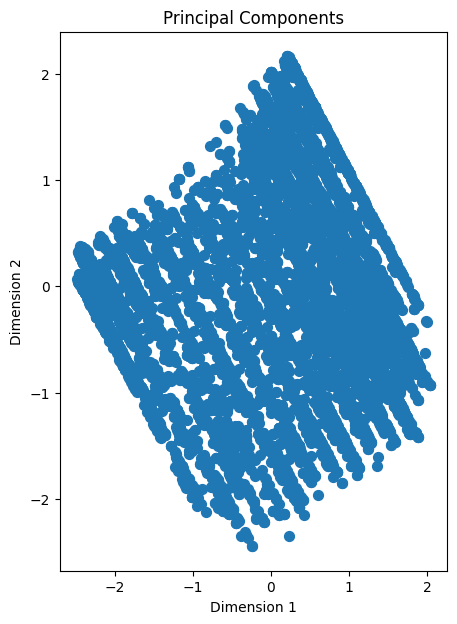

In [63]:
plt.figure(figsize = (5,7))
plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], cmap='viridis', s= 50)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Principal Components')
plt.show()

# Kmeans Clustering

In [65]:
from sklearn.cluster import KMeans

In [66]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(df_pca)

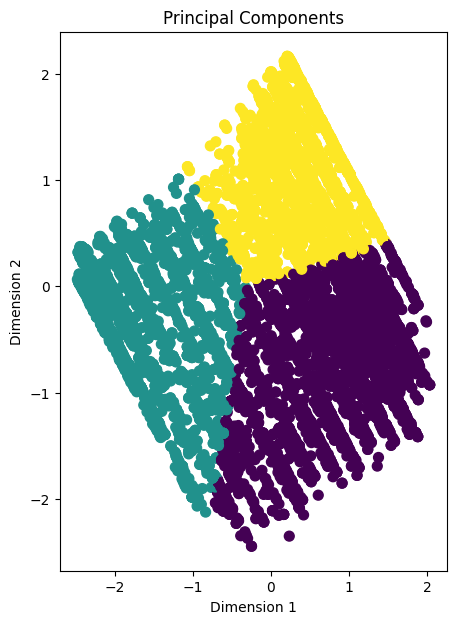

In [67]:
plt.figure(figsize = (5,7))
plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], c=clusters ,cmap='viridis', s= 50)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Principal Components')
plt.show()

# Elbow Method

In [70]:
inertias = []
number_clusters = range(1, 15)

for number_cluster in number_clusters:
  kmeans_model = KMeans(n_clusters = number_cluster, random_state=42, n_init=10)
  kmeans_model.fit(df_pca)
  inertias.append(kmeans_model.inertia_)

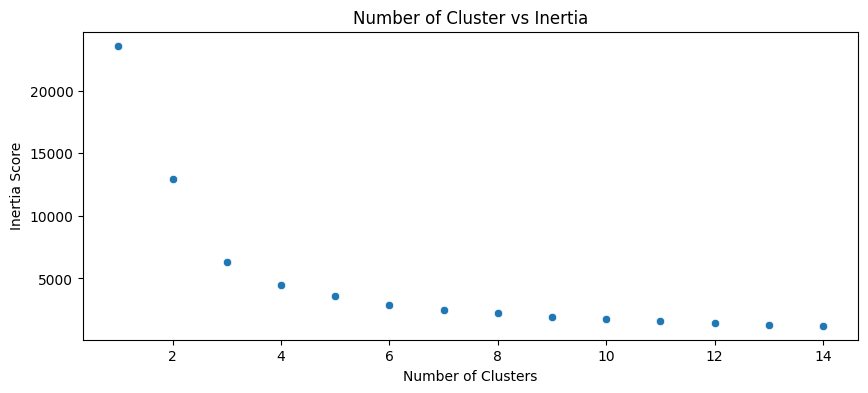

In [71]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=number_clusters, y=inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Number of Cluster vs Inertia')
plt.show()

In [72]:
df_zero['Cluster'] = clusters

In [73]:
df_zero

,drugName,condition,rating,sentiment_label,sentiment_score,topic,Cluster
107765,Methylphenidate,ADHD,8,LABEL_0,0.500915,Have side effect,0
83645,Adderall,ADHD,7,LABEL_0,0.599657,Have side effect,0
60658,Quillivant XR,ADHD,5,LABEL_0,0.755106,Have side effect,1
140073,Adzenys XR-ODT,ADHD,10,LABEL_2,0.958735,Effective,2
55723,Adderall XR,ADHD,8,LABEL_0,0.746726,Have side effect,2
...,...,...,...,...,...,...,...
143101,Budesonide / formoterol,moterol),1,LABEL_0,0.532358,Not effective,1
37746,Budesonide / formoterol,moterol),10,LABEL_2,0.419624,Have side effect,0
37746,Budesonide / formoterol,moterol),10,LABEL_2,0.419624,Have side effect,0
84431,Phenylephrine,mulation) (phenylephrine),9,LABEL_2,0.918954,Effective,2


# Exploratory Data Analysis per Cluster

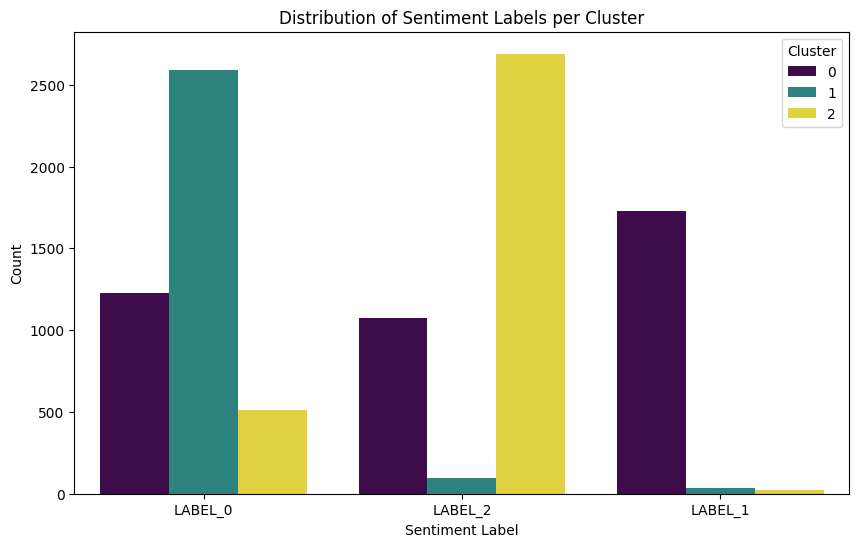

In [74]:
# Create a bar plot of sentiment label counts per cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df_strat, x='sentiment_label', hue='Cluster', palette='viridis')
plt.title('Distribution of Sentiment Labels per Cluster')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [102]:
cluster_0_drugs = df_zero[df_zero['Cluster'] == 0]['drugName'].value_counts().head(30)
print("Top 10 Drugs in Cluster 0:\n", cluster_0_drugs)

Top 10 Drugs in Cluster 0:
 drugName
Levonorgestrel                        120
Ethinyl estradiol / norethindrone      75
Etonogestrel                           63
Ethinyl estradiol / levonorgestrel     60
Nexplanon                              54
Escitalopram                           42
Ethinyl estradiol / norgestimate       42
Quetiapine                             39
Alprazolam                             35
Phentermine                            33
Zoloft                                 32
Tramadol                               32
Mirena                                 31
Gabapentin                             30
Skyla                                  30
Citalopram                             28
Isotretinoin                           27
Implanon                               27
Cymbalta                               26
Bupropion                              26
Varenicline                            26
Chantix                                25
Trazodone                              

In [103]:
cluster_1_drugs = df_zero[df_zero['Cluster'] == 1]['drugName'].value_counts().head(30)
print("Top 10 Drugs in Cluster 1:\n", cluster_1_drugs)

Top 10 Drugs in Cluster 1:
 drugName
Etonogestrel                          118
Ethinyl estradiol / norethindrone      79
Miconazole                             63
Levonorgestrel                         55
Nexplanon                              52
Ethinyl estradiol / norgestimate       46
Ethinyl estradiol / levonorgestrel     39
Depo-Provera                           36
Medroxyprogesterone                    33
Metronidazole                          25
Bupropion / naltrexone                 23
Bupropion                              23
Mirena                                 22
Venlafaxine                            21
Implanon                               21
Tramadol                               20
Fluoxetine                             20
Tapentadol                             20
Sertraline                             20
Amitriptyline                          19
Lo Loestrin Fe                         18
Desogestrel / ethinyl estradiol        17
Ethinyl estradiol / etonogestrel       

In [104]:
cluster_2_drugs = df_zero[df_zero['Cluster'] == 2]['drugName'].value_counts().head(30)
print("Top 10 Drugs in Cluster 2:\n", cluster_2_drugs)

Top 10 Drugs in Cluster 2:
 drugName
Levonorgestrel                        68
Etonogestrel                          40
Phentermine                           37
Ethinyl estradiol / norgestimate      35
Liraglutide                           34
Ethinyl estradiol / norethindrone     33
Varenicline                           31
Clonazepam                            28
Escitalopram                          28
Duloxetine                            27
Bupropion / naltrexone                25
Zoloft                                25
Contrave                              24
Alprazolam                            23
Ethinyl estradiol / levonorgestrel    22
Sertraline                            22
Drospirenone / ethinyl estradiol      22
Mirena                                21
Venlafaxine                           21
Citalopram                            21
Lexapro                               20
Methadone                             20
Doxycycline                           20
Qsymia              

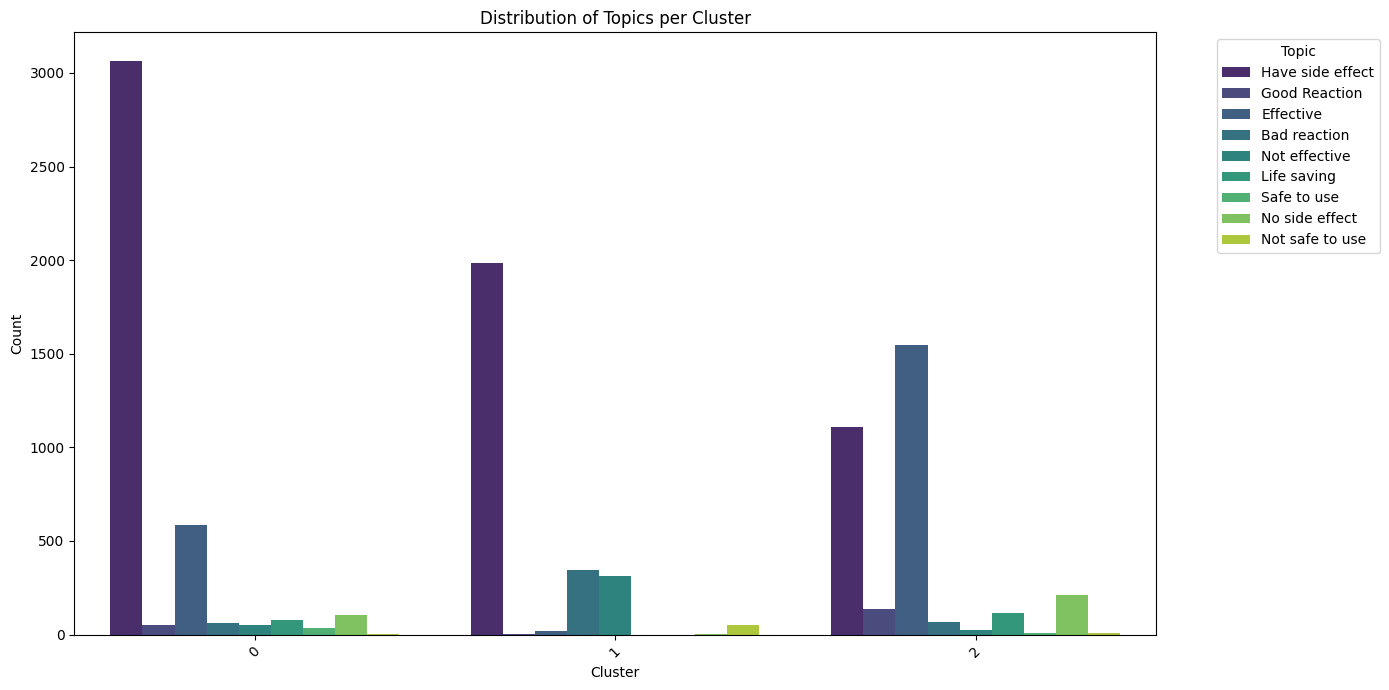

In [84]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df_zero, x='Cluster', hue='topic', palette='viridis')
plt.title('Distribution of Topics per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [118]:
# Top 30 conditions in Cluster 1

cluster_0_condition = df_zero[df_zero['Cluster'] == 0]['condition'].value_counts().head(30)
print("Top 30 conditions in Cluster 0:\n", cluster_0_condition.index.tolist())

Top 30 conditions in Cluster 0:
 ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Obesity', 'ADHD', 'Insomnia', 'Emergency Contraception', 'Weight Loss', 'Smoking Cessation', 'Chronic Pain', 'Migraine', 'Diabetes, Type 2', 'Bowel Preparation', 'ibromyalgia', 'Anxiety and Stress', 'High Blood Pressure', 'Panic Disorde', 'Generalized Anxiety Disorde', 'Constipation', 'Abnormal Uterine Bleeding', 'Rheumatoid Arthritis', 'Migraine Prevention', 'Vaginal Yeast Infection', 'Erectile Dysfunction', 'Major Depressive Disorde', 'Osteoarthritis', 'Muscle Spasm']


In [115]:
# Top 30 conditions in Cluster 1
cluster_1_condition = df_zero[df_zero['Cluster'] == 1]['condition'].value_counts().head(30)
print("Top 30 conditions in Cluster 1:\n", cluster_1_condition.index.tolist())

Top 30 conditions in Cluster 1:
 ['Birth Control', 'Depression', 'Vaginal Yeast Infection', 'Pain', 'Bipolar Disorde', 'Abnormal Uterine Bleeding', 'Acne', 'Anxiety', 'Insomnia', 'High Blood Pressure', 'Diabetes, Type 2', 'Urinary Tract Infection', 'ADHD', 'Major Depressive Disorde', 'Weight Loss', 'Constipation', 'Obesity', 'Bowel Preparation', 'Anxiety and Stress', 'Migraine Prevention', 'ibromyalgia', 'Sinusitis', 'Bacterial Infection', 'Irritable Bowel Syndrome', 'Migraine', 'Bladder Infection', 'Osteoarthritis', 'Panic Disorde', 'Chronic Pain', 'Erectile Dysfunction']


In [116]:
# Top 30 conditions in Cluster 2
cluster_2_condition = df_zero[df_zero['Cluster'] == 2]['condition'].value_counts().head(30)
print("Top 30 conditions in Cluster 2:\n", cluster_2_condition.index.tolist())

Top 30 conditions in Cluster 2:
 ['Birth Control', 'Depression', 'Anxiety', 'Pain', 'Acne', 'Weight Loss', 'Obesity', 'Bipolar Disorde', 'Insomnia', 'ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'Smoking Cessation', 'High Blood Pressure', 'Muscle Spasm', 'ibromyalgia', 'Bowel Preparation', 'Migraine', 'Panic Disorde', 'Opiate Dependence', 'Constipation', 'Osteoarthritis', 'Major Depressive Disorde', 'Anxiety and Stress', 'Generalized Anxiety Disorde', 'Migraine Prevention', 'Hyperhidrosis', 'Allergic Rhinitis', 'Erectile Dysfunction', 'Cough']


# Integrated interpretation (conditions + sentiment)



## Cluster 0 — Neutral / Management-Oriented

### - Chronic mental health

### - Chronic pain

### - Women’s health

### - Long-term condition management

### Cluster 0 reflects stable, long-term condition management characterized by predominantly neutral sentiment, suggesting routine and informational healthcare interactions.

### Users are engaged but not emotionally extreme — typical of maintenance care, refills, monitoring, and follow-ups.

## Cluster 1 — Negative / Acute Care

### - Infections (UTI, sinusitis, bacterial)

### - GI distress

### - Episodic conditions

### Cluster 1 is characterized by acute and infection-related conditions accompanied by predominantly negative sentiment, indicating care-seeking behavior driven by discomfort and immediate symptom burden.

### Negative sentiment aligns with pain, urgency, and disruption, reinforcing the acute-care nature of this cluster.

## Cluster 2 — Positive / Preventive & Lifestyle

### - Smoking cessation

### - Weight loss

### - Opiate dependence recovery

### - Preventive and allergy care

### Cluster 2 is distinguished by predominantly positive sentiment, consistent with conditions associated with lifestyle improvement, preventive care, and behavioral change.

### Positive sentiment suggests perceived progress, success, or motivation, common in lifestyle change and recovery contexts.